In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("data/STAR.csv")
df.set_index("Unnamed: 0", inplace=True)

In [2]:
# # df["birth"].unique()で取得したuniqueな値について、各文字列の空白を削除した後、"Q1"を.0、"Q2"を.25、"Q3"を.5、"Q4"を.75に変換する。その後、文字列から数値へ変換する
df["birth"] = df["birth"].str.replace(" Q1", ".0").str.replace(" Q2", ".25").str.replace(" Q3", ".5").str.replace(" Q4", ".75").astype(float)
# genderの列の値がfemaleだった場合は0に、maleだった場合は1に変換する
df["gender"] = df['gender'].map({'female': 0, 'male': 1})
# lunchの各列に対して、freeの場合は1に、non-freeの場合は0に変換する
df["lunchk"] = df["lunchk"].map({'non-free': 0, 'free': 1})
df["lunch1"] = df["lunch1"].map({'non-free': 0, 'free': 1})
df["lunch2"] = df["lunch2"].map({'non-free': 0, 'free': 1})
df["lunch3"] = df["lunch3"].map({'non-free': 0, 'free': 1})

# 普遍的なデータが入っているデータフレームを作る
df_basic = df[["gender", "ethnicity", "birth"]]
# 列名の最後が3の列を抽出
df_3 = df[[col for col in df.columns if col.endswith("3")]]

# 小学校3年生の学力データに着目するため、df_basicとdf_3を結合する
df_3 = pd.concat([df_basic, df_3], axis=1)

In [5]:
# free lunchの有無で、学力に差があるかを確認する
df_3_free = df_3[df_3["lunch3"] == 1]
df_3_non_free = df_3[df_3["lunch3"] == 0]

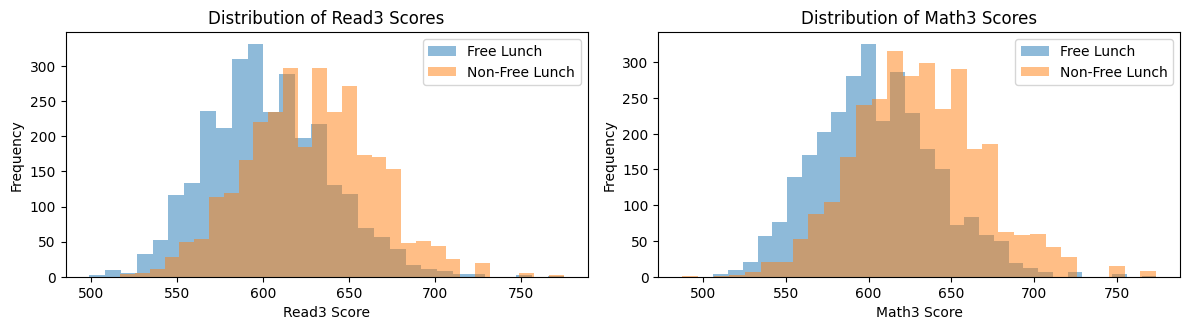

In [6]:
# ヒストグラムを描く
plt.figure(figsize=(12, 6))

# read3のヒストグラム
plt.subplot(2, 2, 1)
plt.hist(df_3_free['read3'], bins=30, alpha=0.5, label='Free Lunch')
plt.hist(df_3_non_free['read3'], bins=30, alpha=0.5, label='Non-Free Lunch')
plt.title('Distribution of Read3 Scores')
plt.xlabel('Read3 Score')
plt.ylabel('Frequency')
plt.legend()

# math3のヒストグラム
plt.subplot(2, 2, 2)
plt.hist(df_3_free['math3'], bins=30, alpha=0.5, label='Free Lunch')
plt.hist(df_3_non_free['math3'], bins=30, alpha=0.5, label='Non-Free Lunch')
plt.title('Distribution of Math3 Scores')
plt.xlabel('Math3 Score')
plt.ylabel('Frequency')
plt.legend()

plt.tight_layout()
plt.show()

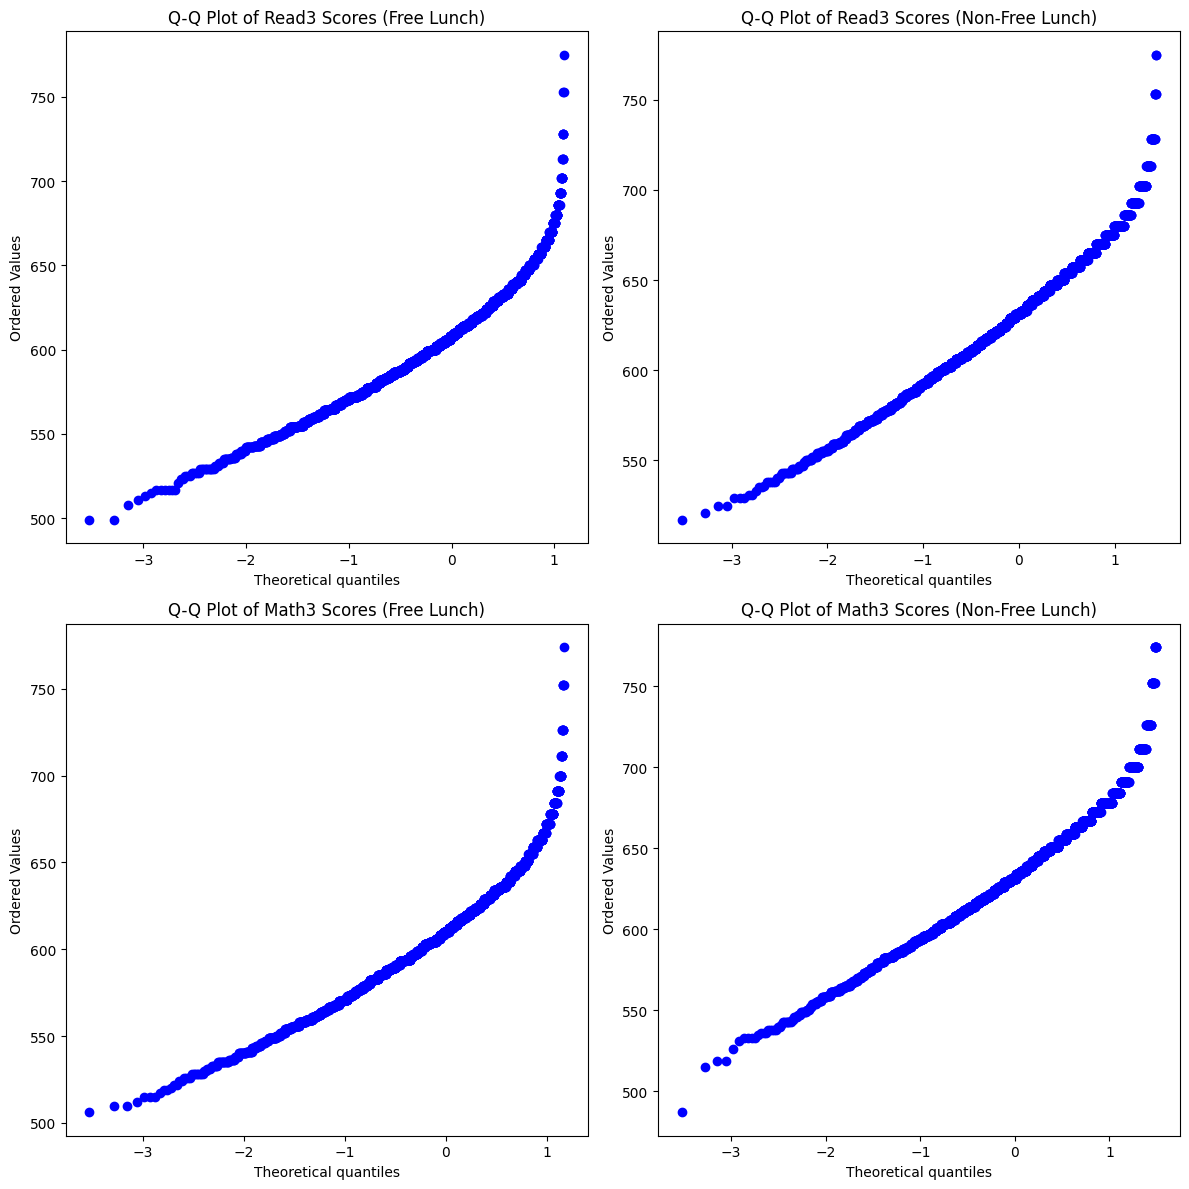

In [12]:
from scipy.stats import probplot
# Q-Qプロットを描く
plt.figure(figsize=(12, 12))

# read3のQ-Qプロット
plt.subplot(2, 2, 1)
probplot(df_3_free['read3'], dist="norm", plot=plt)
plt.title('Q-Q Plot of Read3 Scores (Free Lunch)')
plt.subplot(2, 2, 2)
probplot(df_3_non_free['read3'], dist="norm", plot=plt)
plt.title('Q-Q Plot of Read3 Scores (Non-Free Lunch)')

# math3のQ-Qプロット
plt.subplot(2, 2, 3)
probplot(df_3_free['math3'], dist="norm", plot=plt)
plt.title('Q-Q Plot of Math3 Scores (Free Lunch)')
plt.subplot(2, 2, 4)
probplot(df_3_non_free['math3'], dist="norm", plot=plt)
plt.title('Q-Q Plot of Math3 Scores (Non-Free Lunch)')

plt.tight_layout()
plt.show()

In [17]:
from scipy.stats import shapiro

# 分析対象の列から、欠損値を削除する
read3_for_free = df_3_free['read3'].dropna()
read3_for_non_free = df_3_non_free['read3'].dropna()
math3_for_free = df_3_free['math3'].dropna()
math3_for_non_free = df_3_non_free['math3'].dropna()

# Shapiro-Wilk test for normality
# p-valueが0.05より大きい場合は、正規分布に従う
stat, p_read3_free = shapiro(read3_for_free)
stat, p_read3_non_free = shapiro(read3_for_non_free)
stat, p_math3_free = shapiro(math3_for_free)
stat, p_math3_non_free = shapiro(math3_for_non_free)

if p_read3_free > 0.05:
    print("read3 (Free Lunch) is normally distributed.（正規分布に従うという帰無仮説が採択された）", p_read3_free)
if p_read3_free <= 0.05:
    print("read3 (Free Lunch) is not normally distributed.（正規分布に従うという帰無仮説が棄却された）", p_read3_free)
if p_read3_non_free > 0.05:
    print("read3 (Non-Free Lunch) is normally distributed.（正規分布に従うという帰無仮説が採択された）", p_read3_non_free)
if p_read3_non_free <= 0.05:
    print("read3 (Non-Free Lunch) is not normally distributed.（正規分布に従うという帰無仮説が棄却された）", p_read3_non_free)
if p_math3_free > 0.05:
    print("math3 (Free Lunch) is normally distributed.（正規分布に従うという帰無仮説が採択された）", p_math3_free)
if p_math3_free <= 0.05:
    print("math3 (Free Lunch) is not normally distributed.（正規分布に従うという帰無仮説が棄却された）", p_math3_free)
if p_math3_non_free > 0.05:
    print("math3 (Non-Free Lunch) is normally distributed.（正規分布に従うという帰無仮説が採択された）", p_math3_non_free)
if p_math3_non_free <= 0.05:
    print("math3 (Non-Free Lunch) is not normally distributed.（正規分布に従うという帰無仮説が棄却された）", p_math3_non_free)

read3 (Free Lunch) is not normally distributed.（正規分布に従うという帰無仮説が棄却された） 8.374202955146313e-11
read3 (Non-Free Lunch) is not normally distributed.（正規分布に従うという帰無仮説が棄却された） 0.00023413959946606212
math3 (Free Lunch) is not normally distributed.（正規分布に従うという帰無仮説が棄却された） 5.86764392754405e-11
math3 (Non-Free Lunch) is not normally distributed.（正規分布に従うという帰無仮説が棄却された） 1.6815305492722554e-09


In [16]:
from scipy.stats import ttest_ind, mannwhitneyu

# read3の検定
if p_read3_free > 0.05 and p_read3_non_free > 0.05:
    # 正規分布に従う場合
    stat, p_value_read3 = ttest_ind(read3_for_free, read3_for_non_free)
    test_type_read3 = 't-test'
else:
    # 正規分布に従わない場合
    stat, p_value_read3 = mannwhitneyu(read3_for_free, read3_for_non_free)
    test_type_read3 = 'Mann-Whitney U test'

# math3の検定
if p_math3_free > 0.05 and p_math3_non_free > 0.05:
    # 正規分布に従う場合
    stat, p_value_math3 = ttest_ind(math3_for_free, math3_for_non_free)
    test_type_math3 = 't-test'
else:
    # 正規分布に従わない場合
    stat, p_value_math3 = mannwhitneyu(math3_for_free, math3_for_non_free)
    test_type_math3 = 'Mann-Whitney U test'

if p_value_read3 < 0.05:
    print("There is a significant difference in read3 scores between students with free lunch and students without free lunch.（free lunch と non-free lunch の間で、read3 のスコアに差がないという帰無仮説が棄却された）")
if p_value_read3 >= 0.05:
    print("There is no significant difference in read3 scores between students with free lunch and students without free lunch.（free lunch と non-free lunch の間で、read3 のスコアに差がないという帰無仮説が採択された）")
if p_value_math3 < 0.05:
    print("There is a significant difference in math3 scores between students with free lunch and students without free lunch.（free lunch と non-free lunch の間で、math3 のスコアに差がないという帰無仮説が棄却された）")
if p_value_math3 >= 0.05:
    print("There is no significant difference in math3 scores between students with free lunch and students without free lunch.（free lunch と non-free lunch の間で、math3 のスコアに差がないという帰無仮説が採択された）")

There is a significant difference in read3 scores between students with free lunch and students without free lunch.（free lunch と non-free lunch の間で、read3 のスコアに差がないという帰無仮説が棄却された）
There is a significant difference in math3 scores between students with free lunch and students without free lunch.（free lunch と non-free lunch の間で、math3 のスコアに差がないという帰無仮説が棄却された）


In [18]:
# それぞれの検定のp値を新しいデータフレームに格納し、表形式で表示する
df_p_values_shapiro = pd.DataFrame({
    'Test Type': ['Shapiro-Wilk', 'Shapiro-Wilk', 'Shapiro-Wilk', 'Shapiro-Wilk'],
    'p-value': [p_read3_free, p_read3_non_free, p_math3_free, p_math3_non_free],
    'Normality': ['Non-Normal', 'Non-Normal', 'Non-Normal', 'Non-Normal']
}, index=['Read3 (Free Lunch)', 'Read3 (Non-Free Lunch)', 'Math3 (Free Lunch)', 'Math3 (Non-Free Lunch)'])

df_p_values_U = pd.DataFrame({
    'Test Type': [test_type_read3, test_type_math3],
    'p-value': [p_value_read3, p_value_math3],
    'Difference or Not': ['Significant Difference', 'Significant Difference']
}, index=['Read3', 'Math3'])

In [19]:
df_p_values_U

,Test Type,p-value,Difference or Not
Read3,Mann-Whitney U test,1.189530e-141,Significant Difference
Math3,Mann-Whitney U test,2.706644e-132,Significant Difference


In [20]:
df_p_values_shapiro

,Test Type,p-value,Normality
Read3 (Free Lunch),Shapiro-Wilk,8.374203e-11,Non-Normal
Read3 (Non-Free Lunch),Shapiro-Wilk,2.341396e-04,Non-Normal
Math3 (Free Lunch),Shapiro-Wilk,5.867644e-11,Non-Normal
Math3 (Non-Free Lunch),Shapiro-Wilk,1.681531e-09,Non-Normal
